# Body signal of smoking

## Dataset
This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals. 

dataset can be obtained at: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

## columns

data shape : (55692, 27)

    ID : index
    gender
    age : 5-years gap
    height(cm)
    weight(kg)
    waist(cm) : Waist circumference length
    eyesight(left)
    eyesight(right)
    hearing(left)
    hearing(right)
    systolic : Blood pressure
    relaxation : Blood pressure
    fasting blood sugar
    Cholesterol : total
    triglyceride
    HDL : cholesterol type
    LDL : cholesterol type
    hemoglobin
    Urine protein
    serum creatinine
    AST : glutamic oxaloacetic transaminase type
    ALT : glutamic oxaloacetic transaminase type
    Gtp : γ-GTP
    oral : Oral Examination status
    dental caries
    tartar : tartar status
    smoking


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 

In [2]:
import pandas as pd

dataset = pd.read_csv("smoking.csv")
print(dataset.head(1))

   ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y              0   

   tartar  smoking  
0       Y        0  

[1 rows x 27 columns]


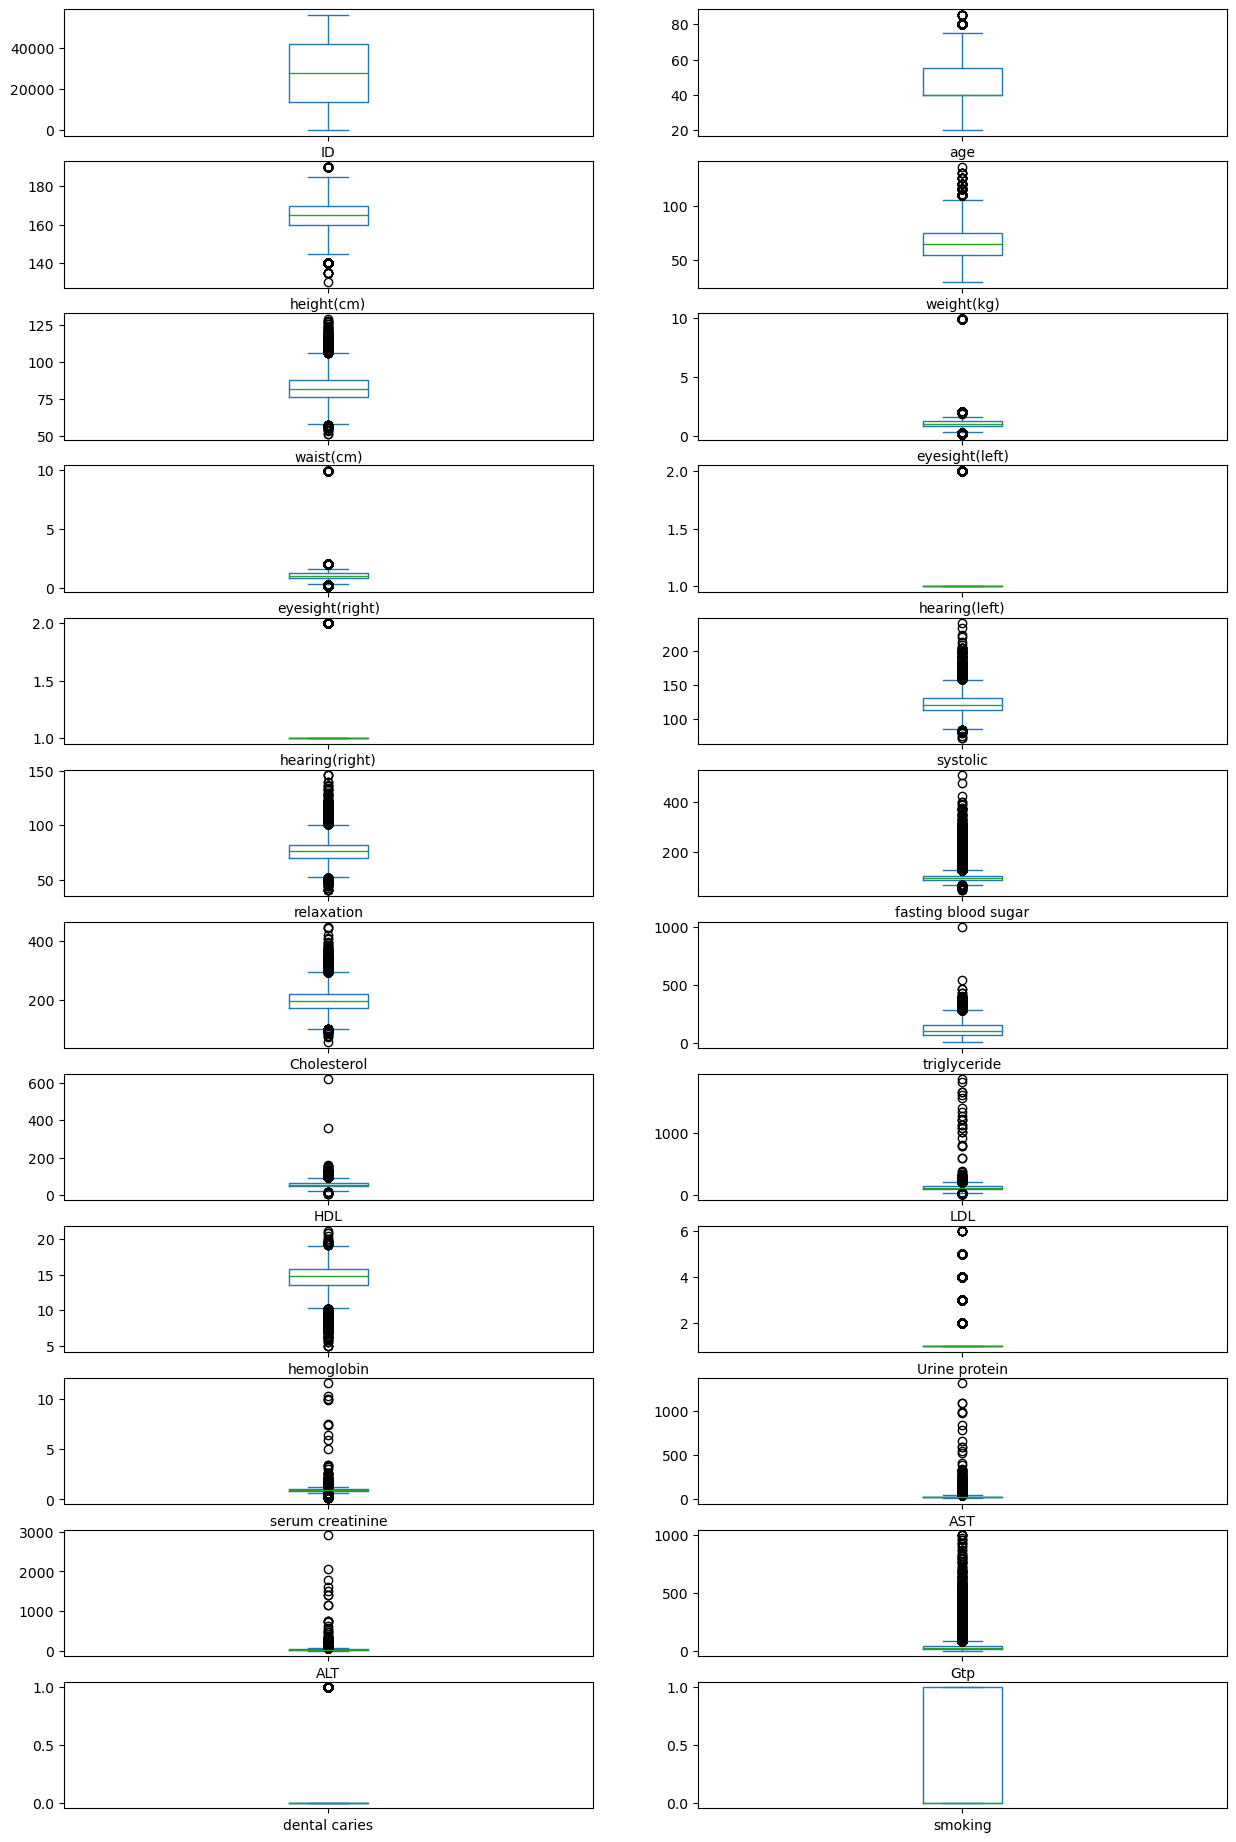

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [15, 50]
dataset.plot(kind='box', subplots=True, layout=(25,2), sharex=False, sharey=False)
plt.show()

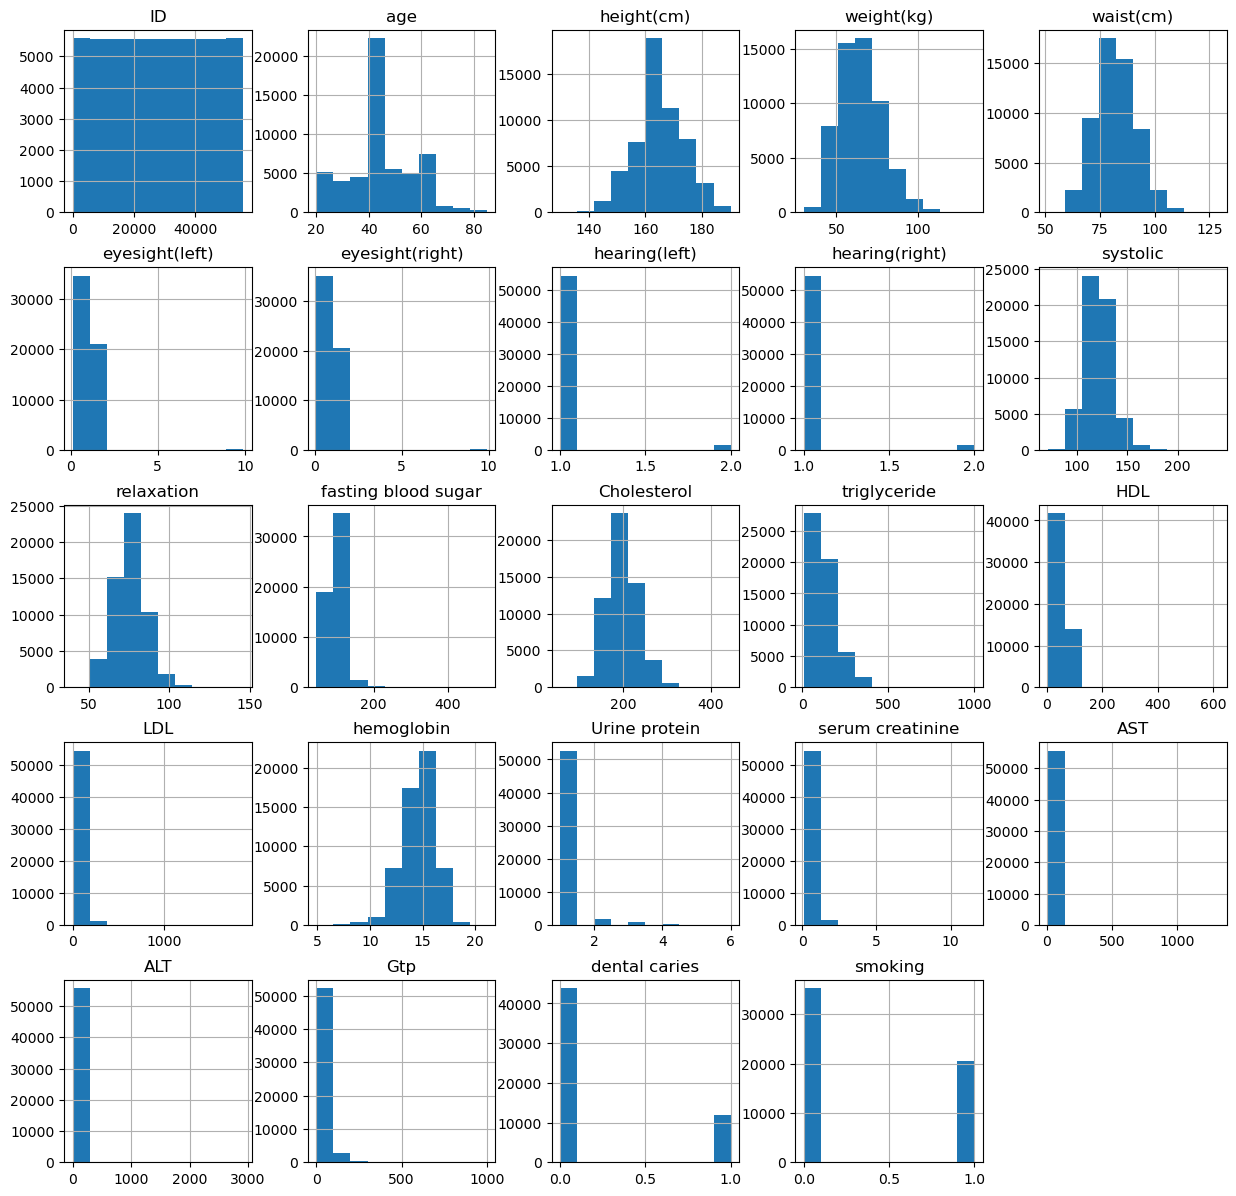

In [4]:
plt.rcParams['figure.figsize'] = [15, 15]
dataset.hist()
plt.show()

In [5]:
dataset.shape

(55692, 27)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [7]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

dataset["tartar"] = label_encoder.fit_transform(dataset["tartar"])

dataset["tartar"].unique()

array([1, 0])

In [8]:
X = dataset.drop(['ID','gender','smoking','height(cm)','weight(kg)','waist(cm)','oral','age'], axis=1)
Y = dataset['smoking']
X.astype(float)
Y.astype(float)

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
55687    0.0
55688    0.0
55689    0.0
55690    0.0
55691    1.0
Name: smoking, Length: 55692, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.model_selection import StratifiedKFold
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.717483 (0.005541)
LDA: 0.715732 (0.004812)
KNN: 0.677463 (0.005791)
CART: 0.753934 (0.007751)
RF: 0.806231 (0.005360)
NB: 0.698247 (0.005910)
SVM: 0.701861 (0.005796)


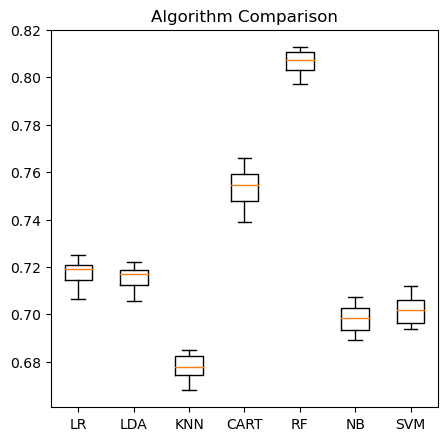

In [14]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

{'Accuracy': 0.8213484154771523, 'Precision': 0.769851601145535, 'Sensitivity_recall': 0.7277873492493232, 'Specificity': 0.8750706613906162, 'F1_score': 0.7482287449392713}
Confusion matrix :


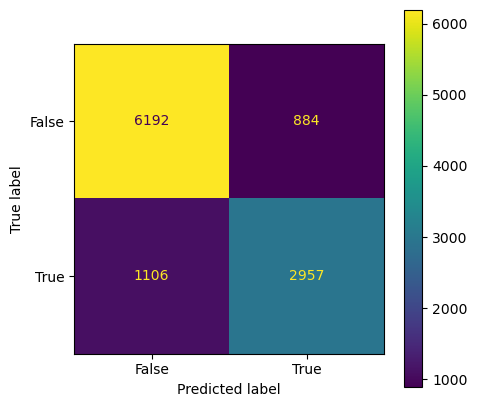

In [15]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

Accuracy = metrics.accuracy_score(y_test, predictions)
Precision = metrics.precision_score(y_test, predictions)
Sensitivity_recall = metrics.recall_score(y_test, predictions)
Specificity = metrics.recall_score(y_test, predictions, pos_label=0)
F1_score = metrics.f1_score(y_test, predictions)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score}) 
print('Confusion matrix :')
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()